In [1]:
import pandas as pd
from PIL.ImageColor import colormap

'''
Info: https://hastie.su.domains/ElemStatLearn/

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal.

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease
'''

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

# Convert binary text data to numbered categories
df['famhist'] = pd.Categorical(df['famhist']).codes

# Extract the name of the attributes (columns)
attributeNames = list(map(lambda x: x.capitalize(), df.columns.tolist()))

In [2]:
import numpy as np

#Convert the dataframe to numpy for later steps
X = df.to_numpy()

# Compute values of M
M = len(attributeNames)
N = len(X)

classLabels = df['chd'].map(lambda x: 'Chd' if x else 'No Chd').to_numpy()
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classLabels))))
C = len(df['chd'])

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

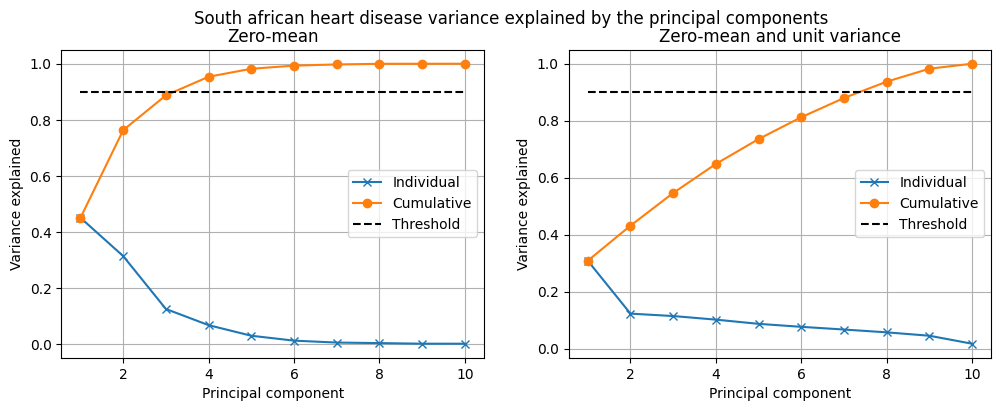

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

def chart_variance_of_PC(Y_matrix, title, index):
    # PCA by computing SVD of Y
    # Note: Here we call the Sigma matrix in the SVD S for notational convinience
    U, S, Vh = svd(Y_matrix, full_matrices=False)

    # Compute variance explained by principal components
    # Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
    rho = (S * S) / (S * S).sum()

    threshold = 0.9

    # Plot variance explained
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title(title)
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()

# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y1 = X - np.ones((N, 1)) * X.mean(axis=0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.2)
plt.suptitle("South african heart disease variance explained by the principal components")

# Create 1 row, 2 columns of subplots
for i in range(2):
    plt.subplot(1, 2, i + 1)  # Use 1-based indexing
    chart_variance_of_PC(Ys[i], titles[i], i + 1)

plt.show()

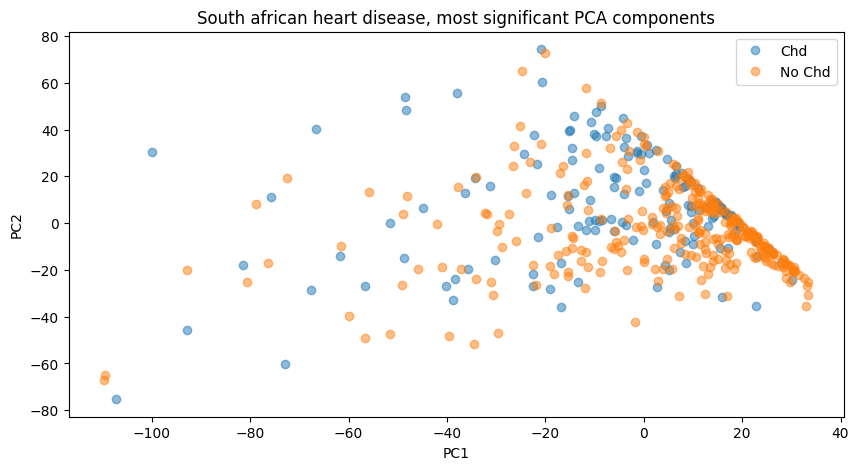

In [4]:
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
# Note: Make absolutely sure you understand what the @ symbol
# does by inspecing the numpy documentation!
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure(figsize=(10, 5))
plt.title("South african heart disease, most significant PCA components")
# Z = array(Z)

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()

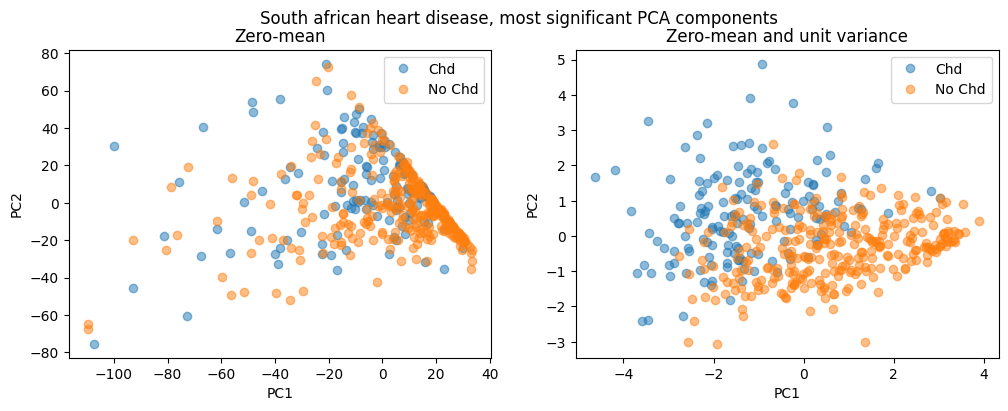

In [5]:
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np

def chart_first_two_PC(Y, title, index):
    # PCA by computing SVD of Y
    U, S, Vh = svd(Y, full_matrices=False)
    # scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
    # of the vector V. So, for us to obtain the correct V, we transpose:
    V = Vh.T

    # Project the centered data onto principal component space
    # Note: Make absolutely sure you understand what the @ symbol
    # does by inspecing the numpy documentation!
    Z = Y @ V

    # Indices of the principal components to be plotted
    i = 0
    j = 1

    # Plot variance explained
    for c in range(C):
        # select indices belonging to class c:
        class_mask = y == c
        plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
    plt.legend(classNames)
    plt.title(title)
    plt.xlabel("PC{0}".format(i + 1))
    plt.ylabel("PC{0}".format(j + 1))

# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y1 = X - np.ones((N, 1)) * X.mean(axis=0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.2)
plt.suptitle("South african heart disease, most significant PCA components")
# Z = array(Z)
# Create 1 row, 2 columns of subplots
for i in range(2):
    plt.subplot(1, 2, i + 1)  # Use 1-based indexing
    chart_first_two_PC(Ys[i], titles[i], i + 1)

plt.show()

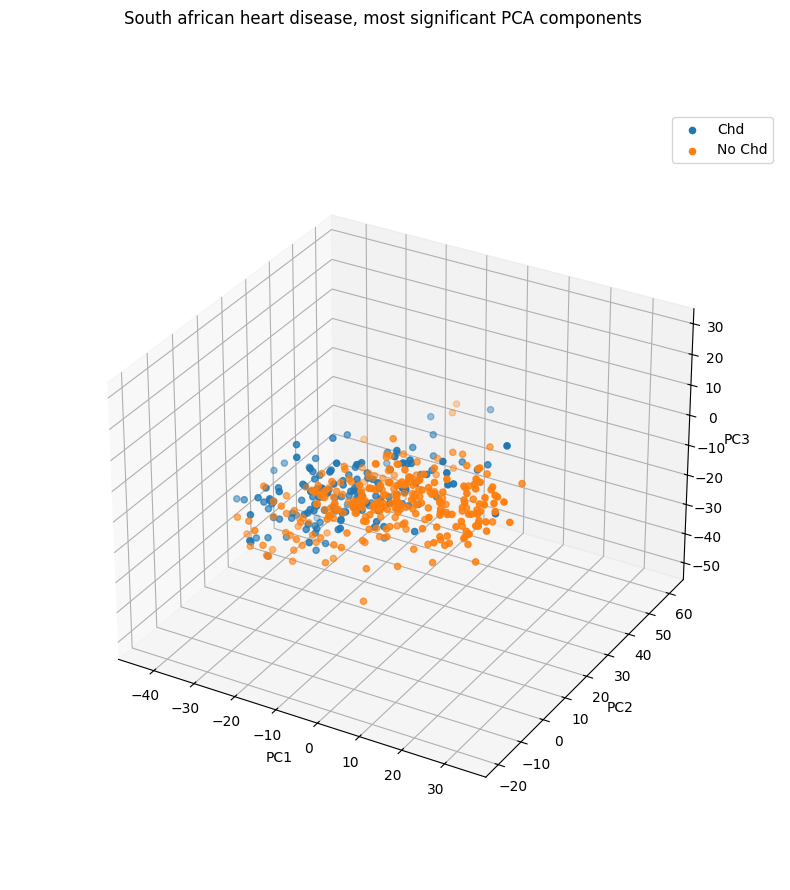

In [6]:
#%matplotlib notebook

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

i = 0
j = 1
k = 2

U, S, Vh = svd(Y2, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
# Note: Make absolutely sure you understand what the @ symbol
# does by inspecing the numpy documentation!
Z = Y @ V

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    ax.scatter(Z[class_mask, i], Z[class_mask, j], Z[class_mask, k])
    ax.set_xlabel("PC{0}".format(i + 1))
    ax.set_ylabel("PC{0}".format(j + 1))
    ax.set_zlabel("PC{0}".format(k + 1))
    ax.legend(classNames)
plt.suptitle('South african heart disease, most significant PCA components')
ax.set_box_aspect(None, zoom=0.85)
plt.show()
import matplotlib.pyplot as plt

/var/folders/cx/dh_rvhrj5656q86nbjpkb89c0000gn/T/ipykernel_22575/118101186.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap("tab10")(np.linspace(0, 1, V.shape[0]))


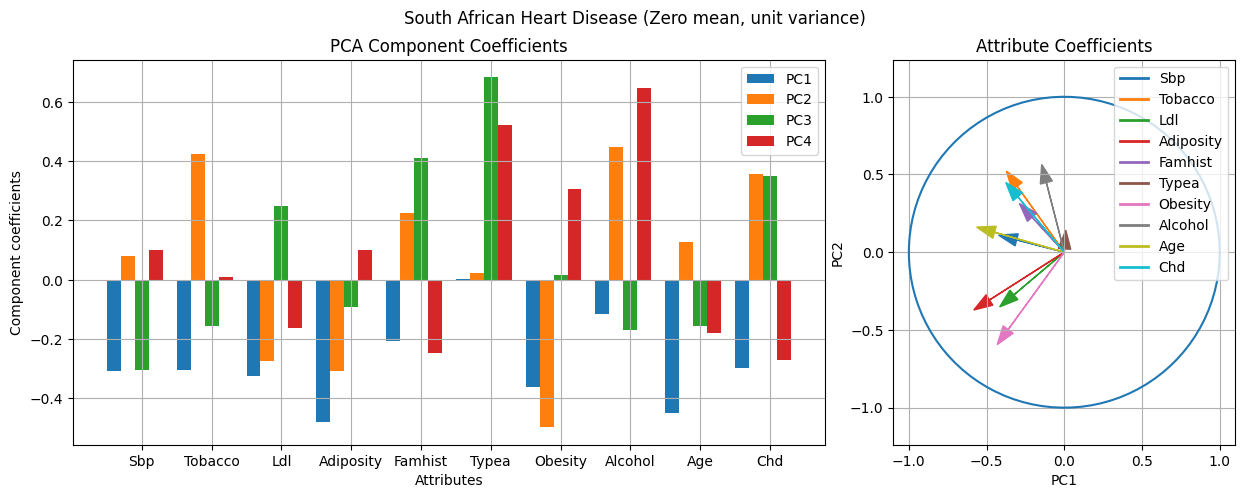

In [7]:

import matplotlib.pyplot as plt
from scipy.linalg import svd
from matplotlib.cm import get_cmap

Y = X - np.ones((N, 1)) * X.mean(0)
Y = Y * (1 / np.std(Y, 0))
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2, 3]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("South African Heart Disease (Zero mean, unit variance)")

# First subplot (2/3 width)
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
for i in pcs:
    ax1.bar(r + i * bw, V[:, i], width=bw)
ax1.set_xticks(r + bw * len(pcs) / 2)
ax1.set_xticklabels(attributeNames)
ax1.set_xlabel("Attributes")
ax1.set_ylabel("Component coefficients")
ax1.legend(legendStrs)
ax1.grid()
ax1.set_title("PCA Component Coefficients")


# Second subplot (1/3 width)
ax2 = plt.subplot2grid((1, 3), (0, 2))
i, j = 0, 1  # Define which principal components to plot

# Use a colormap for distinct colors
colors = get_cmap("tab10")(np.linspace(0, 1, V.shape[0]))

for att in range(V.shape[0]):
    ax2.arrow(0, 0, V[att, i], V[att, j], head_width=0.08, color=colors[att])
    #ax2.text(V[att, i], V[att, j], attributeNames[att], color=colors[att])

ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_xlabel("PC" + str(i + 1))
ax2.set_ylabel("PC" + str(j + 1))
ax2.grid()

# Add a unit circle
theta = np.linspace(0, 2 * np.pi, 100)
ax2.plot(np.cos(theta), np.sin(theta))

# Add a legend
legend_handles = [plt.Line2D([0], [0], color=colors[k], lw=2, label=attributeNames[k]) for k in range(V.shape[0])]
ax2.legend(
    handles=legend_handles,
    fontsize='medium',
    loc='upper right',               # Anchor the legend to the top-right
    bbox_to_anchor=(1, 1),        # Push the legend above the plot
    ncol=1                          # Optionally, split into 2 columns if many attributes
)

ax2.set_title("Attribute Coefficients")
ax2.axis("equal")

plt.show()


/var/folders/cx/dh_rvhrj5656q86nbjpkb89c0000gn/T/ipykernel_22575/1984809406.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap("tab10")(np.linspace(0, 1, V.shape[0]))


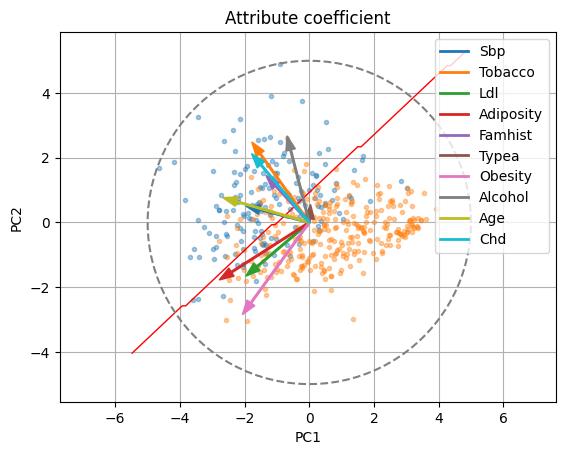

In [8]:
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from matplotlib.cm import get_cmap

# Assuming X, y, classNames, and attributeNames are already defined
# Center and standardize the data
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))

# PCA via SVD
U, S, Vh = svd(Y2, full_matrices=False)
V = Vh.T

# Project data onto principal component space
Z = Y2 @ V

# Indices of principal components to plot
i, j = 0, 1

# Create figure and axes
fig, ax = plt.subplots()

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit a logistic regression model
clf = LogisticRegression()
clf.fit(Z[:, [i, j]], y)

# Create a grid to plot the decision boundary
x_min, x_max = Z[:, i].min() - 1, Z[:, i].max() + 1
y_min, y_max = Z[:, j].min() - 1, Z[:, j].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class labels for the grid points
Z_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_pred = Z_pred.reshape(xx.shape)

# Scatter plot of the projected data
for c in range(C):
    class_mask = y == c
    ax.plot(Z[class_mask, i], Z[class_mask, j], ".", alpha=0.4)

ax.contour(xx, yy, Z_pred, levels=[0.3], colors='red', linewidths=1)

ax.legend(classNames)
ax.set_title("Attribute coefficient")
ax.set_xlabel("PC{0}".format(i + 1))
ax.set_ylabel("PC{0}".format(j + 1))

# Use a colormap for distinct colors
colors = get_cmap("tab10")(np.linspace(0, 1, V.shape[0]))

# Plot attribute vectors (arrows) on top of the scatter plot
for att in range(V.shape[0]):
    ax.arrow(0, 0, V[att, i] * 5, V[att, j] * 5,
             head_width=0.3, width=0.05, color=colors[att], zorder=3)

# Add a unit circle
theta = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(theta) * 5, np.sin(theta) * 5, linestyle='--', color='gray')

# Add legend for attributes
legend_handles = [plt.Line2D([0], [0], color=colors[k], lw=2, label=attributeNames[k]) for k in range(V.shape[0])]
ax.legend(handles=legend_handles, fontsize='medium', loc='upper right', bbox_to_anchor=(1, 1))

ax.grid()
ax.axis("equal")

plt.show()


In [9]:
Z_pred

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(100, 100))

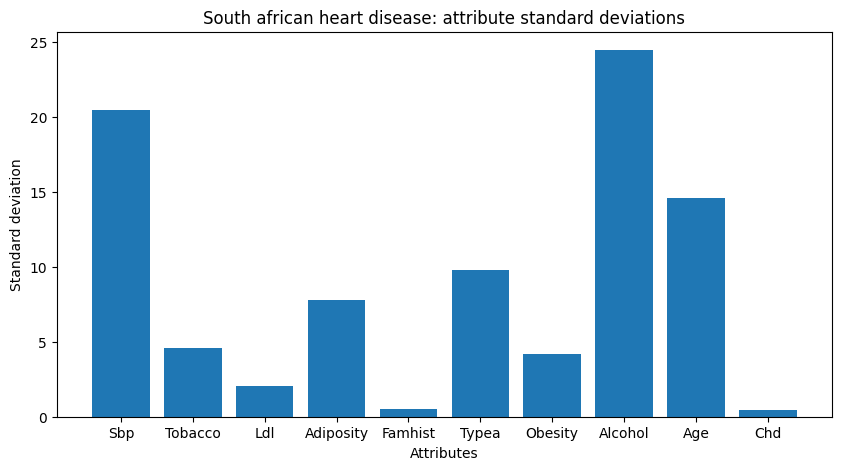

In [10]:
## exercise 3.1.6
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1, X.shape[1] + 1)
plt.figure(figsize=(10, 5))
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("South african heart disease: attribute standard deviations")
plt.show()

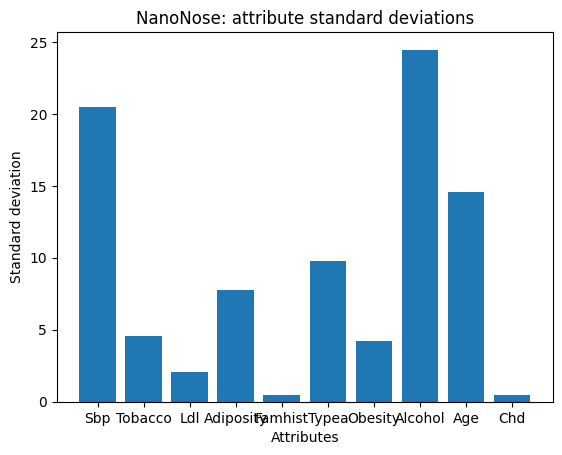

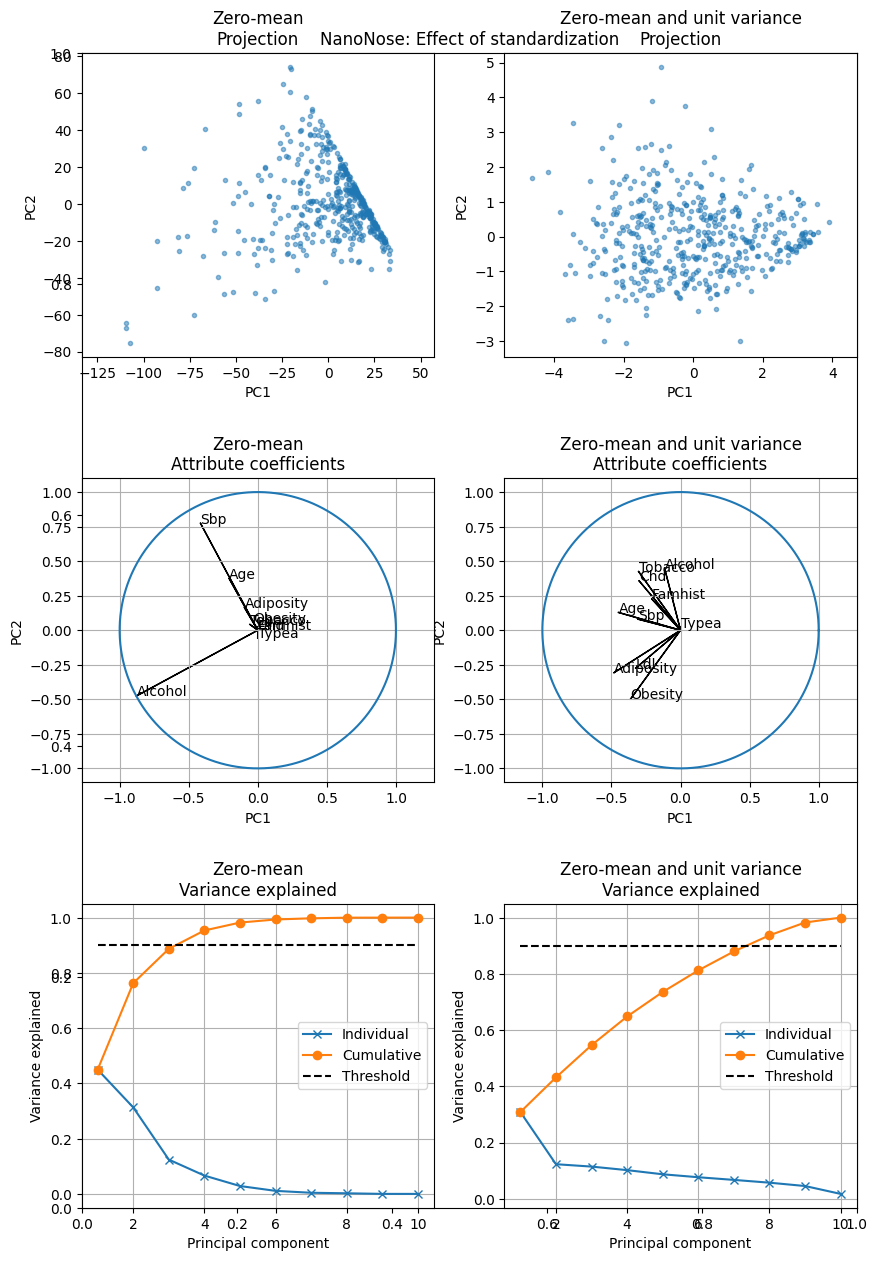

In [11]:
## exercise 3.1.6
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("NanoNose: attribute standard deviations")

## Investigate how standardization affects PCA

# Try this *later*, and explain the effect
# X_s = X.copy() # Make a to be "scaled" version of X
# X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("NanoNose: Effect of standardization")
nrows = 3
ncols = 2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T  # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    #if k == 1:
    #    V = -V
    #    U = -U

    # Compute variance explained
    rho = (S * S) / (S * S).sum()

    # Compute the projection onto the principal components
    Z = U * S

    # Plot projection
    plt.subplot(nrows, ncols, 1 + k)

    plt.plot(Z[:, i], Z[:, j], ".", alpha=0.5)
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.title(titles[k] + "\n" + "Projection")

    plt.axis("equal")

    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, i], V[att, j])
        plt.text(V[att, i], V[att, j], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.grid()
    # Add a unit circle
    plt.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    plt.title(titles[k] + "\n" + "Attribute coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title("Variance explained by principal components")
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()
    plt.title(titles[k] + "\n" + "Variance explained")

plt.show()


In [22]:
#Prepare the class Labeling for typeA

typeA_cutoff = 55

classLabels_typea = df['typea'].map(lambda x: 'TypeA +' if x >= typeA_cutoff else 'TypeA -').to_numpy()
classNames_typea = sorted(set(classLabels_typea))
classDict_typea = dict(zip(classNames, range(len(classLabels))))

# Extract vector y, convert to NumPy array
y_typea = np.asarray([classDict[value] for value in classLabels])

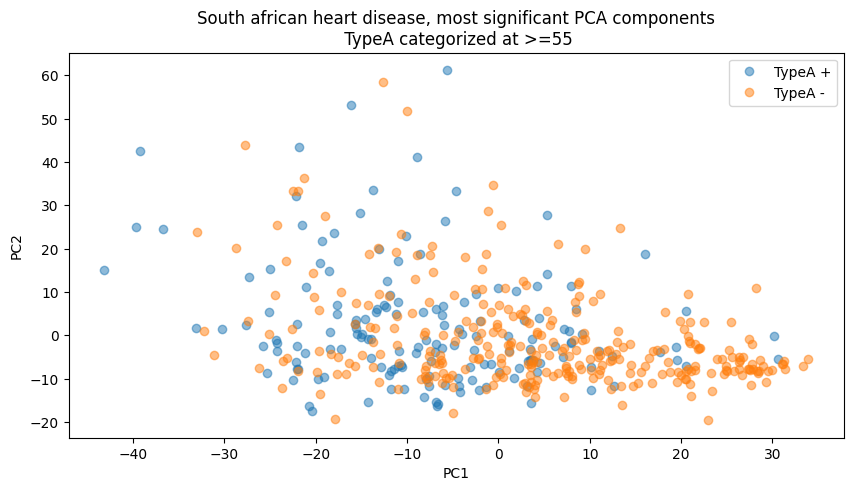

In [29]:
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))

# PCA by computing SVD of Y
U, S, Vh = svd(Y2, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
# Note: Make absolutely sure you understand what the @ symbol
# does by inspecing the numpy documentation!
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure(figsize=(10, 5))
plt.title(f"South african heart disease, most significant PCA components\n TypeA categorized at >={typeA_cutoff}")
# Z = array(Z)

for c in range(C):
    # select indices belonging to class c:
    class_mask = y_typea == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames_typea)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()